In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [22]:
file_path = r"C:\Users\nadav.k\Documents\DS\DL_classification\classification_data\testing.h5"

In [23]:
with h5py.File(file_path, "r") as hdf:
    # Inspect keys
    print("Keys in the file:", list(hdf.keys()))

   
    sentinel1_data = hdf["sen1"][:]
    sentinel2_data = hdf["sen2"][:]
    labels = hdf["label"][:]



Keys in the file: ['label', 'new_labels', 'sen1', 'sen2']


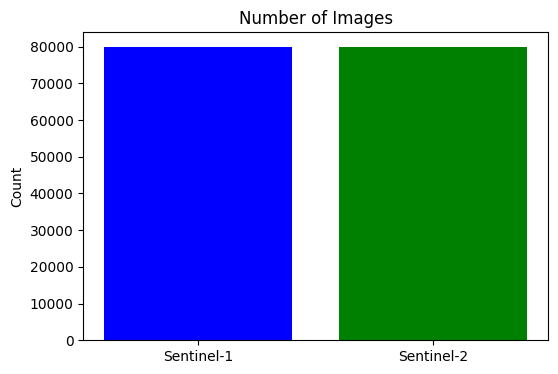

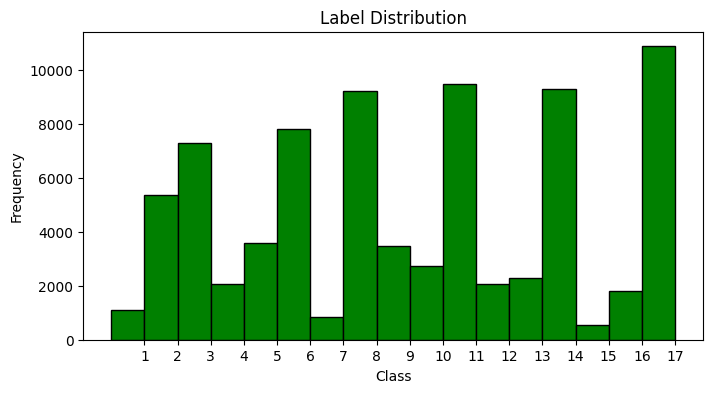

In [24]:
# 1. Number of Sentinel-1 and Sentinel-2 Images
num_sentinel1 = sentinel1_data.shape[0]
num_sentinel2 = sentinel2_data.shape[0]

plt.figure(figsize=(6, 4))
plt.bar(["Sentinel-1", "Sentinel-2"], [num_sentinel1, num_sentinel2], color=["blue", "green"])
plt.title("Number of Images")
plt.ylabel("Count")
plt.show()

# Convert one-hot encoded labels to class indices
label_indices = np.argmax(labels, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(label_indices, bins=np.arange(label_indices.min(), label_indices.max() + 2), 
         color="green", edgecolor="black")

# Set x-axis ticks to show labels from 1 to 17
plt.xticks(ticks=np.arange(1, 18), labels=np.arange(1, 18))

plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print(sentinel1_data.shape[0])
print(sentinel2_data.shape[0])

In [ ]:
train_path = r"C:\Users\nadav.k\Documents\DS\DL_classification\classification_data\testing.h5"

In [ ]:
with h5py.File(train_path, "r") as hdft:
    # Inspect keys
    print("Keys in the file:", list(hdft.keys()))

   
    sentinel1_test_data = hdft["sen1"][:]
    sentinel2_test_data = hdft["sen2"][:]
    test_labels = hdft["label"][:]

In [ ]:
print(sentinel1_test_data.shape[0])
print(sentinel2_test_data.shape[0])

In [ ]:
sentinel1_data.shape[0]+sentinel1_test_data.shape[0]

In [ ]:
# 3. Image Dimensions
sentinel1_dims = sentinel1_data.shape[1:]  # Assuming (samples, channels, width, height)
sentinel2_dims = sentinel2_data.shape[1:]  # Assuming the same structure

print(f"Sentinel-1 Dimensions: {sentinel1_dims}")
print(f"Sentinel-2 Dimensions: {sentinel2_dims}")

# 4. Pixel Intensity Distribution (Sentinel-1 and Sentinel-2)
plt.figure(figsize=(12, 6))

for i in range(sentinel1_data.shape[1]):  # Iterate over Sentinel-1 channels
    plt.hist(sentinel1_data[:, i, :, :].ravel(), bins=50, alpha=0.5, label=f"Sentinel-1 Channel {i + 1}")

for j in range(sentinel2_data.shape[1]):  # Iterate over Sentinel-2 channels
    plt.hist(sentinel2_data[:, j, :, :].ravel(), bins=50, alpha=0.5, label=f"Sentinel-2 Channel {j + 1}")

plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# 5. Display Sample Images
def display_sample_images(data, label_data, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        sample_image = data[i].mean(axis=0)  # Averaging over channels for simplicity
        ax.imshow(sample_image, cmap="gray")
        ax.set_title(f"Label: {label_data[i]}")
        ax.axis("off")
    plt.suptitle(title)
    plt.show()


In [ ]:
display_sample_images(sentinel1_data, labels, "Sentinel-1 Sample Images")
display_sample_images(sentinel2_data, labels, "Sentinel-2 Sample Images")